# EDA

## Import Libs

In [1]:
import pathlib
from PIL import Image
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

%matplotlib inline 

## JSON to Data Frame

In [2]:
datas=['train', 'validation', 'test']
df=[pd.DataFrame(), pd.DataFrame(), pd.DataFrame()]
for i in range(len(datas)):
    with open('./data/json/{0}.json'.format(datas[i])) as data:
        df[i] = json.load(data)
        images={'images':df[i]['images']for key in df[i].keys()}
        df_images=pd.DataFrame(images)['images'].apply(pd.Series)
        if datas[i]!='test':
            annotations={'annotations':df[i]['annotations']for key in df[i].keys()}
            df_annotations=pd.DataFrame(annotations)['annotations'].apply(pd.Series)
            df[i] = pd.merge(df_annotations, df_images, on='image_id', how='outer')
        else:
            df[i]=pd.DataFrame(df_images)
        df[i]['url'] = df[i]['url'].apply(lambda x:str(x[0]))

In [3]:
train_data=df[0]
val_data=df[1]
test_data=df[2]

### Train Data

In [4]:
train_data.head()

,image_id,label_id,url
0,1,5,https://img13.360buyimg.com/imgzone/jfs/t2857/...
1,2,5,http://www.tengdakeli.cn/350/timg01/uploaded/i...
2,3,5,https://img13.360buyimg.com/imgzone/jfs/t8899/...
3,4,5,http://img4.tbcdn.cn/tfscom/i1/2855447419/TB2S...
4,5,5,http://a.vpimg4.com/upload/merchandise/287883/...


In [5]:
print('Train Data Shape:{0}'.format(train_data.shape))

Train Data Shape:(194828, 3)


### Val Data

In [6]:
val_data.head()

,image_id,label_id,url
0,1,38,http://www.ghs.net/public/images/fb/3d/51/3beb...
1,2,63,https://img.alicdn.com/imgextra/TB2chFei9YH8KJ...
2,3,33,http://static-news.17house.com/web/news/201602...
3,4,126,http://img000.hc360.cn/g6/M07/CB/88/wKhQsFNNVJ...
4,5,18,https://img.alicdn.com/imgextra/T1sLtpFH8aXXXX...


In [7]:
print('Val Data Shape:{0}'.format(val_data.shape))

Val Data Shape:(6400, 3)


### Test Data

In [8]:
test_data.head()

,image_id,url
0,1,https://img13.360buyimg.com/imgzone/jfs/t13174...
1,2,http://img35.ddimg.cn/79/22/1258168705-1_u.jpg
2,3,https://img.alicdn.com/imgextra/TB19HtjKXXXXXc...
3,4,https://img13.360buyimg.com/imgzone/jfs/t16498...
4,5,http://img4.99114.com/group1/M00/7D/C5/wKgGTFf...


In [9]:
print('Test Data Shape:{0}'.format(test_data.shape))

Test Data Shape:(12800, 2)


## Checking Data

### Missing Data in Taining Data set

In [10]:
total = train_data.isnull().sum().sort_values(ascending = False)
percent = (train_data.isnull().sum()/train_data.count()).sort_values(ascending = False)
missing_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

,Total,Percent
url,0,0.0
label_id,0,0.0
image_id,0,0.0


### Checking duplicate of training data

In [11]:
train_data.nunique()

image_id    194828
label_id       128
url         194828
dtype: int64

### Missing Data in Validation Data set

In [12]:
total = val_data.isnull().sum().sort_values(ascending = False)
percent = (val_data.isnull().sum()/val_data.count()).sort_values(ascending = False)
missing_val_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_val_data.head()

,Total,Percent
url,0,0.0
label_id,0,0.0
image_id,0,0.0


### Checking duplicate of Validation data

In [13]:
val_data.nunique()

image_id    6400
label_id     128
url         6400
dtype: int64

### Missing Data in Test Data set

In [14]:
total = test_data.isnull().sum().sort_values(ascending = False)
percent = (test_data.isnull().sum()/test_data.count()).sort_values(ascending = False)
missing_test_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_test_data.head()

,Total,Percent
url,0,0.0
image_id,0,0.0


### Checking duplicate of Test data

In [15]:
test_data.nunique()

image_id    12800
url         12800
dtype: int64

## Distribution of training data 

C:\Users\mingcheng.yen\AppData\Local\Continuum\anaconda3\envs\python3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


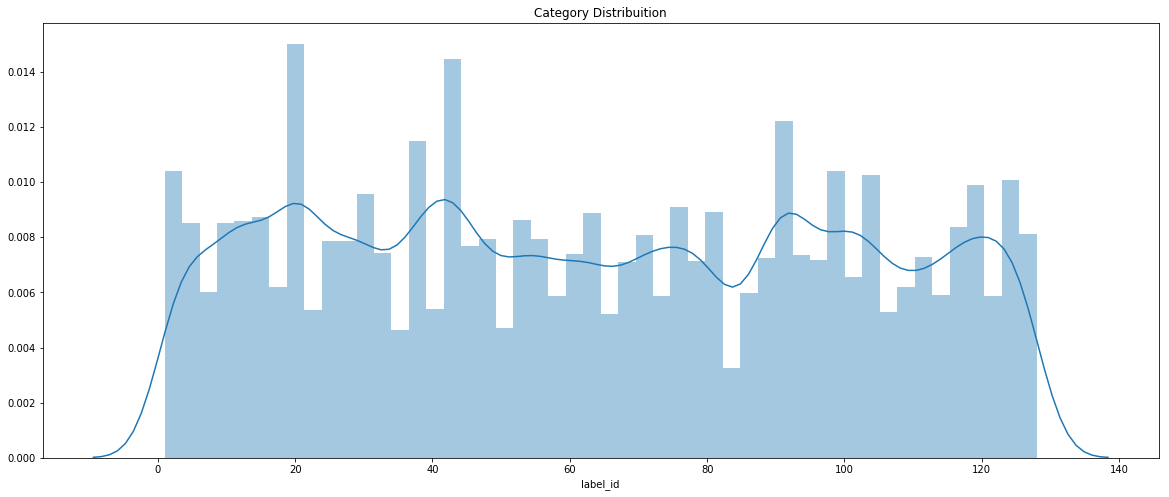

In [16]:
plt.figure(figsize = (20, 8))
plt.title('Category Distribuition')
sns.distplot(train_data['label_id'])
plt.show()

Text(0.5,1,'Distribution of Classes')

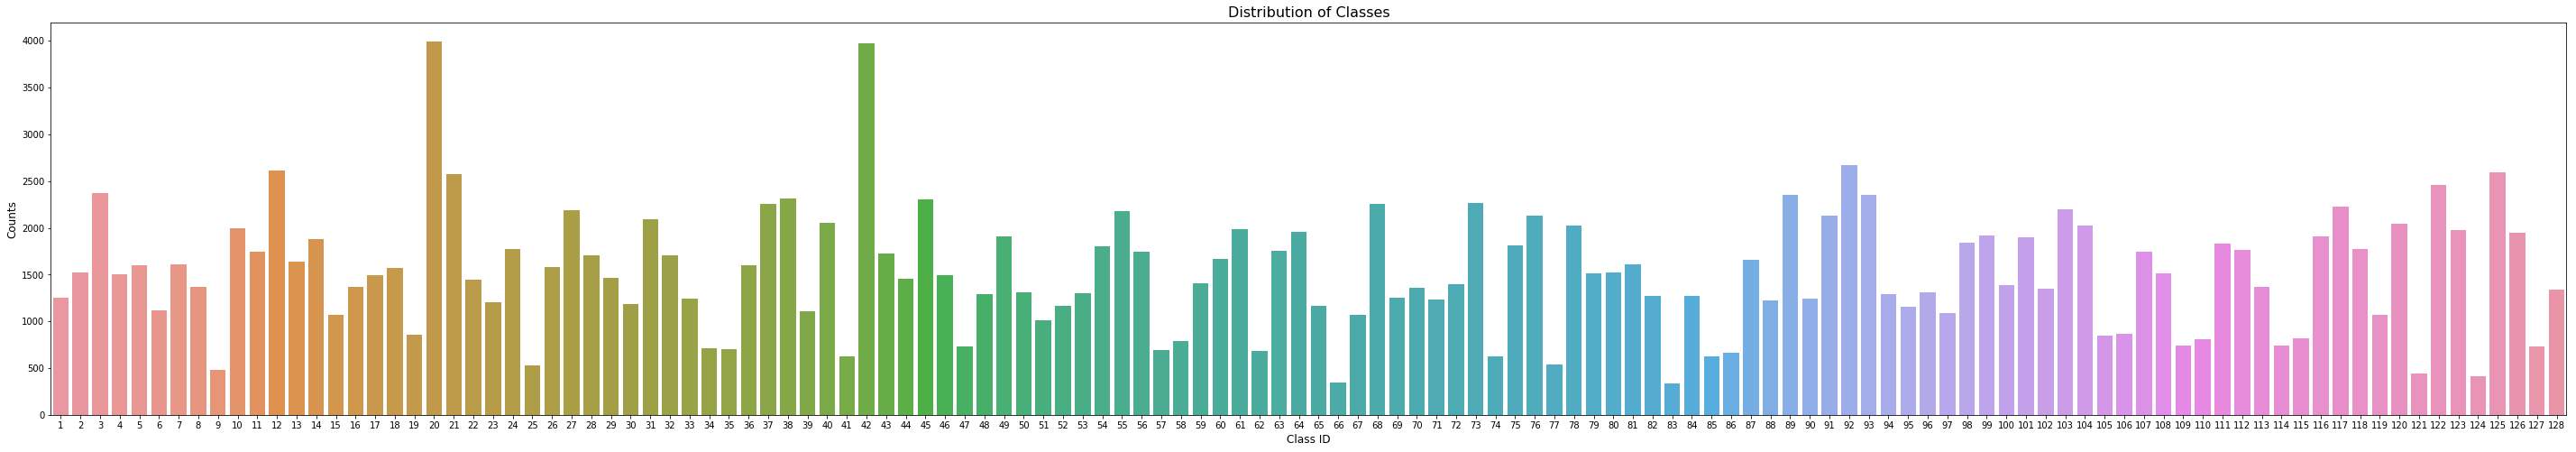

In [17]:
plt.figure(figsize=(50,8))
count = train_data['label_id'].value_counts()
sns.barplot(count.index,  count.values)
plt.xlabel('Class ID', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Distribution of Classes", fontsize=16)

### Most frequent of class in training data

In [18]:
temp = pd.DataFrame(train_data.label_id.value_counts())
temp.reset_index(inplace=True)
temp.columns = ['label_id','count']
temp.head(10)

,label_id,count
0,20,3996
1,42,3973
2,92,2666
3,12,2609
4,125,2598
5,21,2577
6,122,2462
7,3,2368
8,89,2353
9,93,2350


### Least frequent of class in training data

In [19]:
temp.sort_values(by='count', ascending=True).head(10)

,label_id,count
127,83,332
126,66,342
125,124,415
124,121,442
123,9,477
122,25,527
121,77,543
120,85,621
119,41,625
118,74,629


## Distribution of validation data 

C:\Users\mingcheng.yen\AppData\Local\Continuum\anaconda3\envs\python3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


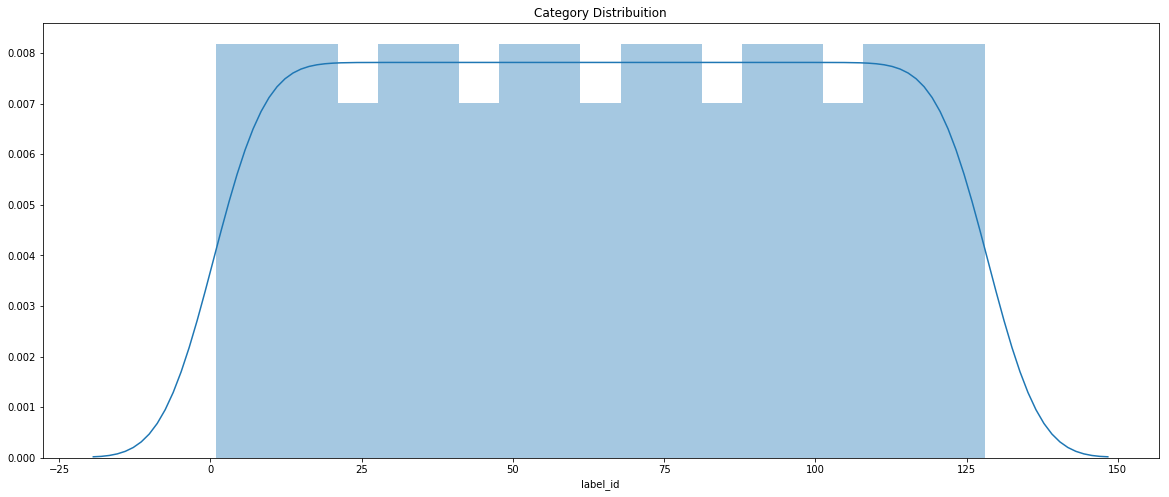

In [20]:
plt.figure(figsize = (20, 8))
plt.title('Category Distribuition')
sns.distplot(val_data['label_id'])
plt.show()

Text(0.5,1,'Distribution of Classes')

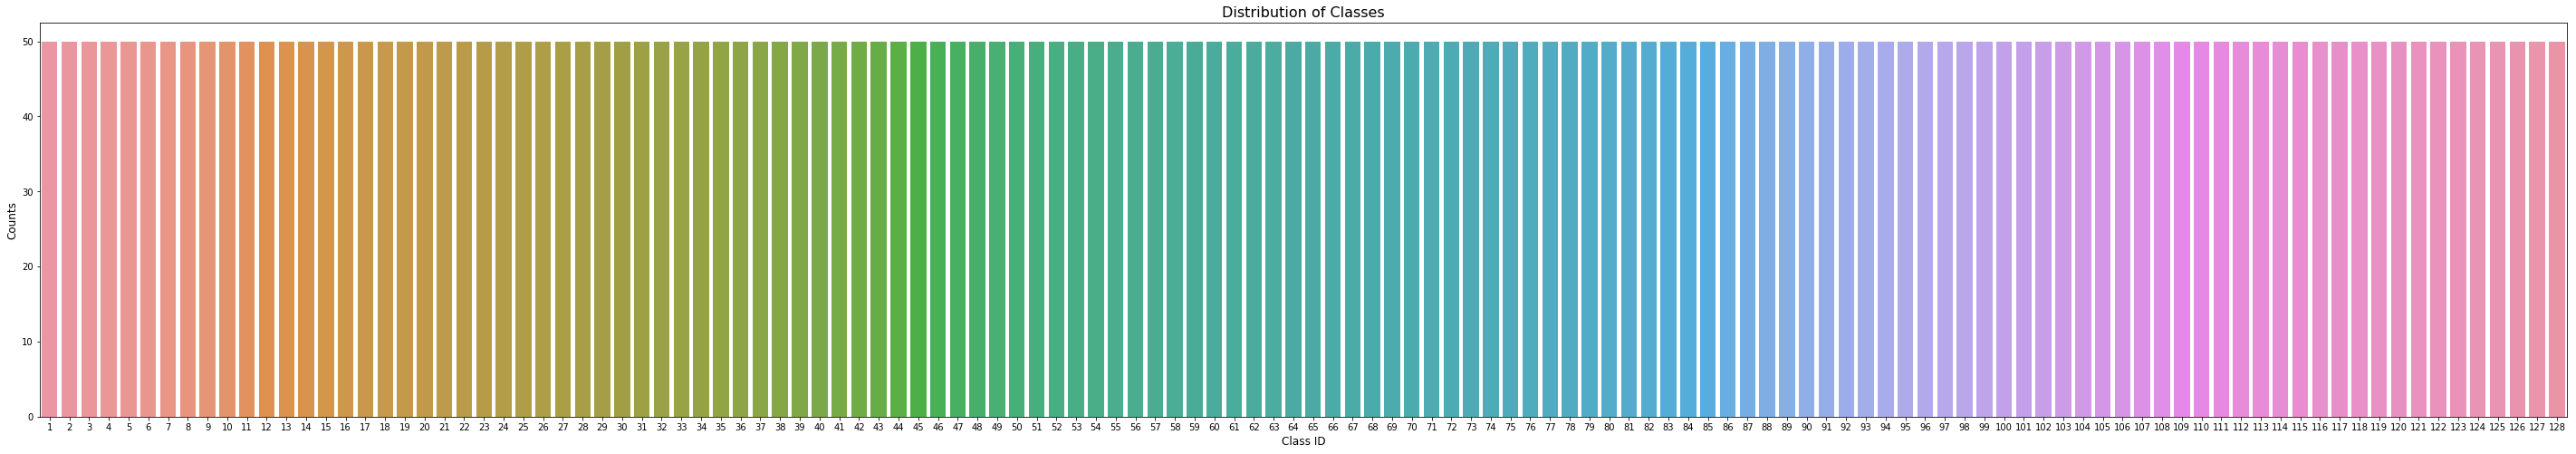

In [21]:
plt.figure(figsize=(50,8))
count = val_data['label_id'].value_counts()
sns.barplot(count.index,  count.values)
plt.xlabel('Class ID', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Distribution of Classes", fontsize=16)

# Extract website name

In [22]:
train_data['website'] = [(url.split('//', 1)[1]).split('/', 1)[0] for url in train_data['url']]
test_data['website'] = [(url.split('//', 1)[1]).split('/', 1)[0] for url in test_data['url']]
val_data['website'] = [(url.split('//', 1)[1]).split('/', 1)[0] for url in val_data['url']]

In [23]:
print('Train shape:{0} Val Shape{1} Test shape{2}'.format(train_data.shape, val_data.shape, test_data.shape))

Train shape:(194828, 4) Val Shape(6400, 4) Test shape(12800, 3)


In [24]:
train_data.head()

,image_id,label_id,url,website
0,1,5,https://img13.360buyimg.com/imgzone/jfs/t2857/...,img13.360buyimg.com
1,2,5,http://www.tengdakeli.cn/350/timg01/uploaded/i...,www.tengdakeli.cn
2,3,5,https://img13.360buyimg.com/imgzone/jfs/t8899/...,img13.360buyimg.com
3,4,5,http://img4.tbcdn.cn/tfscom/i1/2855447419/TB2S...,img4.tbcdn.cn
4,5,5,http://a.vpimg4.com/upload/merchandise/287883/...,a.vpimg4.com


In [25]:
test_data.head()

,image_id,url,website
0,1,https://img13.360buyimg.com/imgzone/jfs/t13174...,img13.360buyimg.com
1,2,http://img35.ddimg.cn/79/22/1258168705-1_u.jpg,img35.ddimg.cn
2,3,https://img.alicdn.com/imgextra/TB19HtjKXXXXXc...,img.alicdn.com
3,4,https://img13.360buyimg.com/imgzone/jfs/t16498...,img13.360buyimg.com
4,5,http://img4.99114.com/group1/M00/7D/C5/wKgGTFf...,img4.99114.com


## Top occurances of websites in training data

Text(0.5,1,'websites names with their occurances')

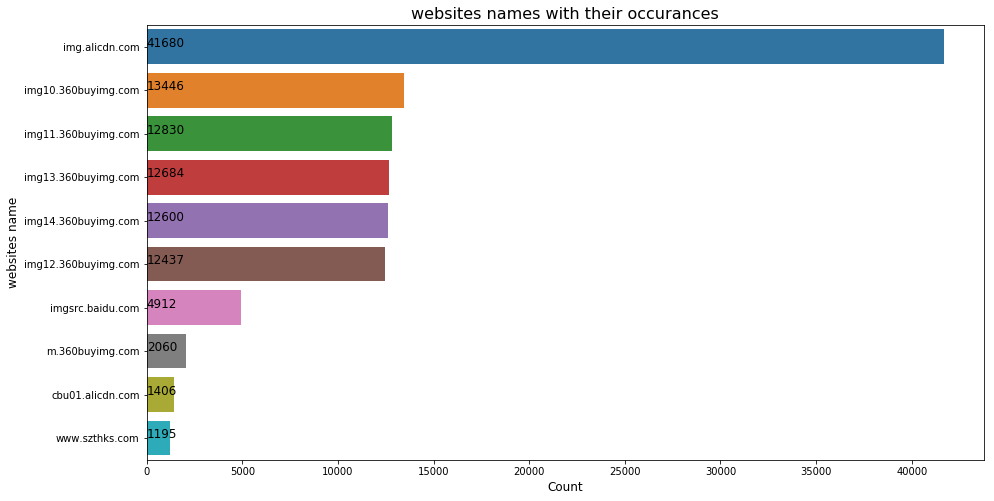

In [26]:
plt.figure(figsize=(15,8))
count = train_data.website.value_counts().head(10)
sns.barplot(count.values, count.index)
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('websites name', fontsize=12)
plt.title("websites names with their occurances", fontsize=16)

## Top occurances of websites in validation data

Text(0.5,1,'Website names with their occurances')

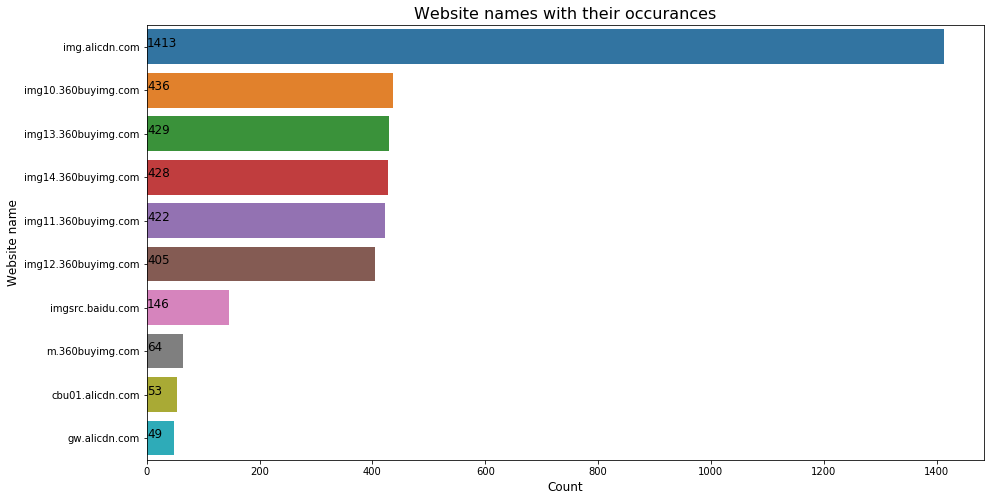

In [27]:
plt.figure(figsize=(15,8))
count = val_data.website.value_counts().head(10)
sns.barplot(count.values, count.index)
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Website name', fontsize=12)
plt.title("Website names with their occurances", fontsize=16)

## Top occurances of websites in test data

Text(0.5,1,'Website names with their occurances')

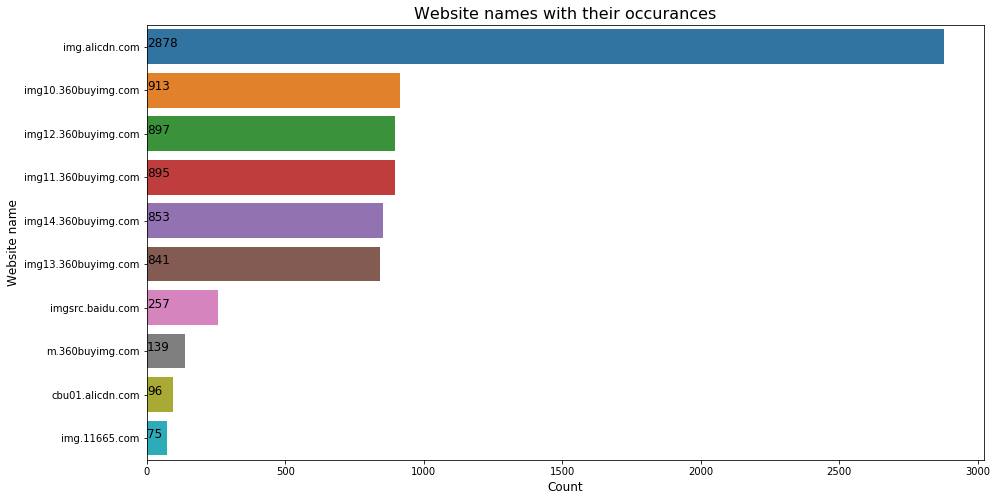

In [28]:
plt.figure(figsize=(15,8))
count = test_data.website.value_counts().head(10)
sns.barplot(count.values, count.index)
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Website name', fontsize=12)
plt.title("Website names with their occurances", fontsize=16)